# Latar Belakang
US Terminal Security Agency (TSA) merupakan suatu badan yang memiliki wewenang terhadap keamanan sistem dalam suatu bandara. Sehingga segala kerusakan, kehilangan atau pencurian barang milik penumpang merupakan tanggung jawab dari TSA. Masyarakat dapat mengajukan claim kepada TSA atas kerugian yang dialaminya, sehingga segala bentuk claim yang dihadapi oleh TSA telah dimonitor dalam suatu Database.

## Pernyataan Masalah
Dengan banyaknya claim yang diajukan oleh masyarakat, kini TSA ingin mengetahui **Airport mana yang memiliki claim terbanyak dan terbesar dan pada bulan apa**. Informasi ini akan membantu TSA untuk mengurangi biaya claim yang diajukan oleh masyarakat yang mengalami kerugian, sehingga dapat memberikan solusi serta peningkatan pelayanan dalam penanganan barang masyarakat.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik Airport yang memiliki tingkat claim terbesar, dan pada bulan apa kejadian tersebut sering terjadi?**

## Data 

Berikut merupakan data yang akan dianalisis dan yang sudah dikumpulkan oleh US Terminal Security Agency (TSA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisikan informasi berupa gugatan atau claim yang telah dilaporkan oleh pengunjung kepada US TSA, terdapat 13 Kolom dalam dataset yaitu

- `Claim Number` : Nomor Ajuan Claim (ID Unik)
- `Date Received` : Tanggal ajuan tersebut diterima oleh Tim US TSA
- `Incident Date` : Tanggal kejadian sesuai dengan Claim pengunjung
- `Airport Code` : Kode Bandara di US
- `Airport Name` : Nama Bandara tempat kejadian
- `Airline Name` : Nama Maskapai yang digunakan pengunjung
- `Claim Type` : Jenis Claim yang diajukan oleh pengunjung
- `Claim Site` : Lokasi Claim
- `Item` : Jenis barang yang ingin di Claim oleh pengunjung
- `Claim Amount` : Nilai Claim yang diajukan oleh pengunjung
- `Status` : Status Claim tersebut
- `Close Amount` : Nilai Claim yang sudah disetujui dan sudah diberikan ke pengunjung
- `Disposition` : Status akhir dari Claim tersebut

Berikut merupakan 5 data teratas dan terbawah dari Dataset tersebut

In [2]:
df = pd.read_csv('/Users/Stefan/Documents/Capstone 2/tsa_claims.csv')
display(df.head(),df.tail())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


## Data Cleaning

Pada Dataset diatas, dapat dilihat bahwa terdapat beberapa kolom yang tidak memiliki data atau missing values. Sebelum data tersebut dianalisis, perlu adanya Cleaning Data, agar hasil analisa yang dilakukan leibh mudah dan akurat. Setiap penangan missing values tersebut yang dilakukan, akan disertai dengan justifikasi langkah yang diambil.


In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (204267, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


Berdasarkan data 5 teratas dan terbawah, kita sudah bisa melihat Data Type pada masing-masing kolom. Dari hasil informasi, dapat dilihat bahwa  semua Data Type masih berupa object. Terdapat beberapa kolom yang harus disesuaikan kembali data typenya seperti

- `Date Received` : Tanggal / Date
- `Incident Date` : Tanggal / Date
- `Claim Amount` : Angka / Float
- `Close Amount` : Angka / Float

Pada `Claim Amount` dan `Close Amount` terdapat lambang "$" yang tidak dapat dibaca sebagai integer, sehingga lambang tersebut akan dihilangkan terlebih dahulu sebelum dilakukan perubahan Data Type.

In [4]:
df['Date Received'] = pd.to_datetime(df['Date Received'])
df['Incident Date'] = pd.to_datetime(df['Date Received'])

In [5]:
df['Claim Amount'] = df['Claim Amount'].str.replace('$', '')
df['Close Amount'] = df['Close Amount'].str.replace('$', '')

Setelah dicoba untuk dilakukan konversi Data Type, ternydata terdapat nilai pada `Claim Amount` dan `Close Amount` yang memiliki titik koma (;) dan ada row yang berisi "-" pada angka yang diinput, sehingga titik koma tersebut harus dihilangkan terlebih dahulu dan untul '-' akan diganti 0 karena dengan asumsi bahwa `Claim Amount` / `Close Amount` yang diajukan masih dalam proses dan belum teridentifikasi

In [6]:
df['Claim Amount'] = df['Claim Amount'].str.replace(';', '')
df['Close Amount'] = df['Close Amount'].str.replace(';', '')
df['Claim Amount'] = df['Claim Amount'].str.replace('-', '0')
df['Close Amount'] = df['Close Amount'].str.replace('-', '0')

In [7]:
df['Claim Amount'] = df['Claim Amount'].astype('float')
df['Close Amount'] = df['Close Amount'].astype('float')

Sehingga berikut merupakan Data Type yang sudah disesuaikan dengan masing-masing jenis Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   204267 non-null  object        
 1   Date Received  204004 non-null  datetime64[ns]
 2   Incident Date  204004 non-null  datetime64[ns]
 3   Airport Code   195743 non-null  object        
 4   Airport Name   195743 non-null  object        
 5   Airline Name   169893 non-null  object        
 6   Claim Type     196354 non-null  object        
 7   Claim Site     203527 non-null  object        
 8   Item           200301 non-null  object        
 9   Claim Amount   200224 non-null  float64       
 10  Status         204262 non-null  object        
 11  Close Amount   135315 non-null  float64       
 12  Disposition    131359 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 20.3+ MB


In [9]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   Claim Number   204258             
1   Date Received  4007               
2   Incident Date  4007               
3   Airport Code   465                
4   Airport Name   485                
5   Airline Name   318                
6   Claim Type     11                 
7   Claim Site     6                  
8   Item           4704               
9   Claim Amount   36116              
10  Status         15                 
11  Close Amount   17162              
12  Disposition    3                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [10]:
df.isna().sum()

Claim Number     0    
Date Received    263  
Incident Date    263  
Airport Code     8524 
Airport Name     8524 
Airline Name     34374
Claim Type       7913 
Claim Site       740  
Item             3966 
Claim Amount     4043 
Status           5    
Close Amount     68952
Disposition      72908
dtype: int64

Berdasarkan informasi dari dataset dapat dilihat bahwa 

- Terdapat 204267 baris dan 13 kolom
- Hampir semua kolom memiliki missing values yang secara ditulis dengan istilah 'NaN', maka pada proses Data Cleaning tersebut, 'NaN' harus dibersihkan agat data dapat dianalisa lebih akurat
- `Airline Name` memiliki missing values yang cukup banyak sebesar 34374 yang berhubungan dengan nama maskapai.
- `Close Amount` memiliki missing values yang banyak, dimana seharusnya `Close Amount` dan `Claim Amount` sama-sama memiliki jumlah data yang sama karena kedua kolom tersebut berhubungan
- `Disposition` juga memiliki missing values yang tertinggi, dimana `Disposition` ini memiliki hubungan dengan `Close Amount`

## Penanganan Missing Value

Berikut merupakan tahapan untuk mengatasi Missing Value pada masing-masing kolom

### Airport Code dan Airport Name

In [11]:
df[df['Airport Name'].isna() & df['Airport Code'].isna()][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
14,0616771L,2002-07-12,2002-07-12,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Denied,NaN,Deny
17,15361,2002-07-15,2002-07-15,NaN,NaN,NaN,Personal Injury,Motor Vehicle,Luggage (all types including footlockers),110000.0,Denied,0.0,Deny
18,0616636L,2002-07-18,2002-07-18,NaN,NaN,NaN,NaN,Other,Luggage (all types including footlockers),NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
19,0714534M,2002-07-22,2002-07-22,NaN,NaN,Northwest Airlines,Property Damage,Other,Photographic Film,68.0,Denied,0.0,Deny
20,0616540L,2002-07-22,2002-07-22,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145066,2010010567106,2009-12-29,2009-12-29,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Currency,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
145144,==> 3.csv.new <==,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186742,<BR>,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186743,==> 4.csv.new <==,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tujuan dari penelitian ini adalah untuk mengetahui Airport mana yang memiliki Claim terbanyak, sehingga apabila pada Kondisi `Airport Code` dan `Airport Name` merupakan 'Nan' maka kita tidak bisa mengidentifikasi data tersebut, dan akan mempengaruhi data lainnya seperti jumlah Claim dan tanggal kejadian. Sehingga data yang memiliki Aiport Name dan Aiport Code 'Nan' akan di drop pada penelitian ini.

In [12]:
df.dropna(subset = 'Airport Name',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195743 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   195743 non-null  object        
 1   Date Received  195631 non-null  datetime64[ns]
 2   Incident Date  195631 non-null  datetime64[ns]
 3   Airport Code   195743 non-null  object        
 4   Airport Name   195743 non-null  object        
 5   Airline Name   167679 non-null  object        
 6   Claim Type     189993 non-null  object        
 7   Claim Site     195364 non-null  object        
 8   Item           192160 non-null  object        
 9   Claim Amount   193383 non-null  float64       
 10  Status         195743 non-null  object        
 11  Close Amount   130718 non-null  float64       
 12  Disposition    127178 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 20.9+ MB


Selain 'Nan' penulis juga melihat pada data unique, bahwa terdapat beberapa data diisi dengna strip '-' yang tidak terbaca apabila kita menggunakan isna, sehingga berikut merupakan data-data yang memiliki data '-' pada dataset

In [13]:
(df=='-').sum()

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     441  
Airport Name     441  
Airline Name     4247 
Claim Type       282  
Claim Site       276  
Item             4423 
Claim Amount     0    
Status           12752
Close Amount     0    
Disposition      0    
dtype: int64

In [14]:
df[(df['Airport Name'] == '-') & (df['Airport Code'] == '-')][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
145256,2010011967631,2010-01-19,2010-01-19,-,-,-,Personal Injury,Checkpoint,Cosmetics & Grooming; Jewelry & Watches; Personal Accessories,0.0,-,NaN,NaN
145338,2010012667890,2010-01-21,2010-01-21,-,-,UAL,Passenger Property Loss,Checked Baggage,Cameras; Cameras; Other,0.0,-,NaN,NaN
145496,2010020368206,2010-01-28,2010-01-28,-,-,-,Property Damage,-,Baggage/Cases/Purses,0.0,-,NaN,NaN
145655,2010022268640,2010-02-03,2010-02-03,-,-,-,Passenger Property Loss,Checked Baggage,Other,0.0,-,NaN,NaN
145657,2010020468312,2010-02-04,2010-02-04,-,-,-,-,-,-,0.0,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-11-20,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other; Clothing,0.0,-,NaN,NaN
204263,2015123027969,2015-12-17,2015-12-17,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,0.0,-,NaN,NaN
204264,2016010428072,2015-12-22,2015-12-22,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,0.0,-,NaN,NaN
204265,2016011328300,2015-12-30,2015-12-30,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,0.0,-,NaN,NaN


Setelah melihat data yang terisi dengan strip '-' kita melihat bahwa data `Airport Code` dan `Airport Name` tidak dapat diketahui, maka data tersebut akan di drop juga

In [15]:
df.drop(df[df['Airport Name'] == '-'].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195302 entries, 0 to 204209
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   195302 non-null  object        
 1   Date Received  195190 non-null  datetime64[ns]
 2   Incident Date  195190 non-null  datetime64[ns]
 3   Airport Code   195302 non-null  object        
 4   Airport Name   195302 non-null  object        
 5   Airline Name   167238 non-null  object        
 6   Claim Type     189552 non-null  object        
 7   Claim Site     194923 non-null  object        
 8   Item           191719 non-null  object        
 9   Claim Amount   192942 non-null  float64       
 10  Status         195302 non-null  object        
 11  Close Amount   130718 non-null  float64       
 12  Disposition    127178 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 20.9+ MB


In [16]:
df.isna().sum()/df.shape[0]*100

Claim Number     0.000000 
Date Received    0.057347 
Incident Date    0.057347 
Airport Code     0.000000 
Airport Name     0.000000 
Airline Name     14.369541
Claim Type       2.944158 
Claim Site       0.194058 
Item             1.834595 
Claim Amount     1.208385 
Status           0.000000 
Close Amount     33.068786
Disposition      34.881363
dtype: float64

### Airline Name

In [17]:
df[df['Airline Name'].isna()][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
1,0202417M,2002-02-02,2002-02-02,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
8,14268,2002-06-20,2002-06-20,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN
9,2004102965797,2002-06-25,2002-06-25,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,NaN,Deny
16,15324,2002-07-12,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Other,Luggage (all types including footlockers),50.00,Denied,0.00,Deny
29,14907,2002-09-09,2002-09-09,SDF,Louisville International,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),275.00,Approved,275.00,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145026,2010010567109,2009-12-29,2009-12-29,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Motor Vehicle,Automobile Parts,1139.19,Approved,1139.19,Approve in Full
145027,2010010567126,2009-12-29,2009-12-29,SEA,Seattle-Tacoma International,NaN,Property Damage,Checkpoint,NaN,35.00,Approved,35.00,Approve in Full
145089,2010010567097,2009-12-30,2009-12-30,DAL,Dallas Love Field,NaN,Passenger Property Loss,Checkpoint,Paintings and Pictures (including frames; etchings; photos; etc),50.00,Denied,0.00,Deny
145120,2010010767262,2009-12-30,2009-12-30,JFK,John F. Kennedy International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),356.45,Denied,0.00,Deny


Disini penulis mencoba untuk melihat pola yang kira-kira dapat diterapkan untuk mengisi nilai 'Nan' pada `Airline Name`, pertama akan dicoba sampel dari `Airport Name`, kemudian dair `Airline Name` yang sudah ada.

In [18]:
df[(df['Airport Name'] == 'Seattle-Tacoma International')][['Airport Name','Airline Name']]

,Airport Name,Airline Name
1,Seattle-Tacoma International,NaN
84,Seattle-Tacoma International,NaN
95,Seattle-Tacoma International,NaN
162,Seattle-Tacoma International,Alaska Airlines
222,Seattle-Tacoma International,Alaska Airlines
...,...,...
203515,Seattle-Tacoma International,Delta Air Lines
203516,Seattle-Tacoma International,Alaska Airlines
203517,Seattle-Tacoma International,Alaska Airlines
203518,Seattle-Tacoma International,Alaska Airlines


In [19]:
df[(df['Airport Name'] == 'Seattle-Tacoma International')]['Airline Name'].nunique()

71

In [20]:
df[(df['Airport Name'] == 'Phoenix Sky Harbor International')]['Airline Name'].nunique()

64

In [21]:
df[(df['Airport Name'] == 'Louisville International')]['Airline Name'].nunique()

22

In [22]:
df[(df['Airline Name'] == 'American Airlines')]['Airport Name'].nunique()

225

In [23]:
df[(df['Airline Name'] == 'Delta (Song)')]['Airport Name'].nunique()

62

In [24]:
df[(df['Airline Name'] == 'Continental Airlines')]['Airport Name'].nunique()

188

Berdasarkan 3 sampel dari `Airport Name` kita melihat bahwa `Airline Name` ini memiliki data unique yang sangat banyak pada setiap `Airport Name`, begitu juga saat kita melihat sampel `Airline Name`, menunjukan bahwa setiap Airline mengunjugni berbagai Airport, sehingga tidak ada unique value untuk mengisi missing value pada kolom `Airline Name`, melihat bahwa `Airline Name` memiliki missing value yang sangat besar sekitar 14% maka, missing value pada `Airline Name` akan diisi dengan 'Unrecorded' yang mengindikasikan bahwa maskapai tersebut tidak terekam.

Apabila 14% data tersebut di drop maka akan berdampak terhadap evaluasi Airport yang akan dilakukan terutama untuk evaluasi US TSA.

In [25]:
df['Airline Name'].fillna(value='Unrecorded',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195302 entries, 0 to 204209
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   195302 non-null  object        
 1   Date Received  195190 non-null  datetime64[ns]
 2   Incident Date  195190 non-null  datetime64[ns]
 3   Airport Code   195302 non-null  object        
 4   Airport Name   195302 non-null  object        
 5   Airline Name   195302 non-null  object        
 6   Claim Type     189552 non-null  object        
 7   Claim Site     194923 non-null  object        
 8   Item           191719 non-null  object        
 9   Claim Amount   192942 non-null  float64       
 10  Status         195302 non-null  object        
 11  Close Amount   130718 non-null  float64       
 12  Disposition    127178 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 20.9+ MB


In [26]:
(df=='-').sum()

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     0    
Airport Name     0    
Airline Name     3908 
Claim Type       200  
Claim Site       174  
Item             4261 
Claim Amount     0    
Status           12311
Close Amount     0    
Disposition      0    
dtype: int64

In [27]:
df[(df['Airline Name'] == '-')][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
145158,2010010767271,2010-01-06,2010-01-06,CLE,Cleveland Hopkins International,-,Passenger Property Loss,Checkpoint,Jewelry & Watches,0.00,-,NaN,NaN
145168,2011011379555,2010-01-06,2010-01-06,MYR,Myrtle Beach International,-,Passenger Property Loss,Checkpoint,Other,0.00,Deny,NaN,NaN
145222,2010012067674,2010-01-12,2010-01-12,JFK,John F. Kennedy International,-,Property Damage,Checkpoint,Audio/Video,107.89,Settle,NaN,NaN
145272,2010012267749,2010-01-19,2010-01-19,ORD,Chicago O'Hare International Airport,-,Property Damage,Checked Baggage,Cosmetics & Grooming,0.00,Deny,NaN,NaN
145298,2010012667872,2010-01-19,2010-01-19,SJC,Norman Y Mineta San Jose International,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,487.89,Approve in Full,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204205,2015102026137,2015-10-20,2015-10-20,ZZX,Non TSA Airport (motor vehicle),-,Motor Vehicle,Motor Vehicle,-,0.00,-,NaN,NaN
204206,2015120827419,2015-12-08,2015-12-08,ZZX,Non TSA Airport (motor vehicle),-,Motor Vehicle,Motor Vehicle,-,3668.84,Settle,NaN,NaN
204207,2015123028002,2015-12-15,2015-12-15,ZZX,Non TSA Airport (motor vehicle),-,Motor Vehicle,Motor Vehicle,-,0.00,-,NaN,NaN
204208,2015072324126,2015-07-16,2015-07-16,ZZZ,Unspecified Personal Injury,-,Personal Injury,Other,-,0.00,-,NaN,NaN


Untuk data `Airline Name` yang berisi '-' atau strip akan diperlakukan sama dengan 'Nan' sehingga akan diisi dengan 'Unrecorded'

In [28]:
df['Airline Name'] = df['Airline Name'].replace('-','Unrecorded')

### Claim Type, Claim Site dan Item

Untuk `Claim Type` dan `Claim Site`, karena kedua data ini memiliki data unique yang sedikit yaitu 11 dan 6, maka untuk missing value dan strip '-' akan diganti dengan tulisan 'Other'

Untuk kolom `Item` berisikan list barang yang ingin di claim oleh pengunjung, namun karena kolom ini tidak akan dianalisa, maka untuk missing value dan strip '-' akan diganti dengan tulisan 'Other' juga.

In [29]:
df['Claim Type'].fillna(value='Other',inplace = True)
df['Claim Site'].fillna(value='Other',inplace = True)
df['Item'].fillna(value='Other',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195302 entries, 0 to 204209
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   195302 non-null  object        
 1   Date Received  195190 non-null  datetime64[ns]
 2   Incident Date  195190 non-null  datetime64[ns]
 3   Airport Code   195302 non-null  object        
 4   Airport Name   195302 non-null  object        
 5   Airline Name   195302 non-null  object        
 6   Claim Type     195302 non-null  object        
 7   Claim Site     195302 non-null  object        
 8   Item           195302 non-null  object        
 9   Claim Amount   192942 non-null  float64       
 10  Status         195302 non-null  object        
 11  Close Amount   130718 non-null  float64       
 12  Disposition    127178 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 20.9+ MB


In [30]:
df['Claim Type'] = df['Claim Type'].replace('-','Other')
df['Claim Site'] = df['Claim Site'].replace('-','Other')
df['Item'] = df['Item'].replace('-','Other')

In [31]:
(df=='-').sum()

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     0    
Airport Name     0    
Airline Name     0    
Claim Type       0    
Claim Site       0    
Item             0    
Claim Amount     0    
Status           12311
Close Amount     0    
Disposition      0    
dtype: int64

### Claim Amount dan Close Amount

`Claim Amount` dan `Close Amount` memiliki data yang berhubungan. Kedua kolom tersebut dihubungkan dengan kolom `Status`, dimana apabila kita melihat pola beberapa data pada kolom 'Status':

- Approved : Claim disetujui maka `Claim Amount` = `Close Amount`
- Settled : Claim telah diselesaikan dan adanya proses negosiasi dari Tim TSA sehingga kecendgrungan `Claim Amount` > `Close Amount`
- Canceled : Claim dibatalkan oleh pengunjung maka `Close Amount` = 0
- Denied : Claim ditolak dari tim TSA yang dapat disebabkan oleh kurangnya bukti pendukung sehingga `Close Amount` = 0

Selain dari status diatas ada beberapa status seperti 'In Litigation', 'Insufficient', bisa diasumsikan bahwa pada tahap ini Claim masih dalam proses / pending sehingga `Claim Amount` akan diasumsikan 0.

In [32]:
df[df['Status'] == 'Approved'][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-01-04,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
3,0909816M,2002-02-07,2002-02-07,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,2002-02-18,2002-02-18,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
6,2007050124750,2002-04-30,2002-04-30,PHL,Philadelphia International Airport,USAir,Passenger Property Loss,Checked Baggage,Professional Equipment,106.52,Approved,106.52,Approve in Full
7,12772,2002-06-20,2002-06-20,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.00,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145078,2010010667223,2009-12-30,2009-12-30,ORD,Chicago O'Hare International Airport,UAL,Property Damage,Checked Baggage,Food items (jams; jellys; candy; etc.); Locks; Luggage (all types including footlockers),37.82,Approved,37.82,Approve in Full
145079,2010010667225,2009-12-30,2009-12-30,ALB,Albany International,Delta Air Lines,Property Damage,Checked Baggage,Luggage (all types including footlockers),64.00,Approved,64.00,Approve in Full
145080,2010010667229,2009-12-30,2009-12-30,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Locks,49.95,Approved,49.95,Approve in Full
145135,2010010667197,2009-12-31,2009-12-31,DEN,Denver International Airport,UAL,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,70.00,Approved,70.00,Approve in Full


In [33]:
df[df['Status'] == 'Settled'][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
1,0202417M,2002-02-02,2002-02-02,SEA,Seattle-Tacoma International,Unrecorded,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
2,0202445M,2002-02-04,2002-02-04,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
5,2005032479636,2002-02-18,2002-02-18,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle
21,16410,2002-07-24,2002-07-24,SDF,Louisville International,Delta Air Lines,Passenger Property Loss,Checkpoint,Luggage (all types including footlockers),600.00,Settled,337.40,Settle
25,0702564M,2002-08-19,2002-08-19,BWI,Baltimore/Washington Intl Thurgood Marshall,America West,Property Damage,Checkpoint,Eyeglasses - (including contact lenses),354.93,Settled,301.69,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145131,2010010567193,2009-12-30,2009-12-30,LAX,Los Angeles International Airport,UAL,Property Damage,Checked Baggage,Other,85.00,Settled,42.50,Settle
145132,2010010667221,2009-12-30,2009-12-30,AUS,Austin-Bergstrom International Airport,Alaska Airlines,Property Damage,Checked Baggage,Medical Equipment & Insturments,80.00,Settled,72.00,Settle
145133,2010010867347,2009-12-30,2009-12-30,ORD,Chicago O'Hare International Airport,UAL,Passenger Property Loss,Checked Baggage,DVD/CD Players; Handbags & Purses (leather or fabric),546.95,Settled,514.73,Settle
145134,2010010867360,2009-12-30,2009-12-30,SJU,Luis Munoz Marin International,American Airlines,Property Damage,Checked Baggage,Alcoholic beverages; Cosmetics - Perfume; toilet articles; medicines; soaps; etc.,185.00,Settled,179.23,Settle


In [34]:
df[df['Status'] == 'Canceled'][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
8,14268,2002-06-20,2002-06-20,PHX,Phoenix Sky Harbor International,Unrecorded,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN
13,13334,2002-07-08,2002-07-08,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,NaN,NaN
24,16403,2002-08-12,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Delta Air Lines,Other,Other,Luggage (all types including footlockers),380.00,Canceled,NaN,NaN
28,15352,2002-08-21,2002-08-21,BWI,Baltimore/Washington Intl Thurgood Marshall,Continental Airlines,Property Damage,Other,Luggage (all types including footlockers),40.00,Canceled,NaN,NaN
31,17846,2002-09-09,2002-09-09,BOS,Boston (Logan) International Airport,Unrecorded,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145081,2010010467090,2009-12-30,2009-12-30,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,217.75,Canceled,NaN,NaN
145082,2010010567149,2009-12-30,2009-12-30,PHX,Phoenix Sky Harbor International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,266.24,Canceled,NaN,NaN
145083,2010010567170,2009-12-30,2009-12-30,OAK,Metropolitan Oakland International,Hawaiian Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,100.00,Canceled,NaN,NaN
145084,2010012167710,2009-12-30,2009-12-30,SLC,Salt Lake City International Airport,Delta Air Lines,Passenger Property Loss,Checkpoint,Other; Video Recordings (blank & commercial),428.92,Canceled,NaN,NaN


In [35]:
df[df['Status'] == 'Denied'][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
9,2004102965797,2002-06-25,2002-06-25,ATL,Hartsfield-Jackson Atlanta International Airport,Unrecorded,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,NaN,Deny
15,15242,2002-07-12,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Other,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny
16,15324,2002-07-12,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Unrecorded,Other,Other,Luggage (all types including footlockers),50.00,Denied,0.0,Deny
32,17201,2002-09-09,2002-09-09,PVD,TF Green Airport; Providence,Delta Air Lines,Other,Other,Other,250.00,Denied,0.0,Deny
33,2004050550501,2002-09-11,2002-09-11,BWI,Baltimore/Washington Intl Thurgood Marshall,Unrecorded,Passenger Property Loss,Checkpoint,Other,1200.00,Denied,NaN,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145126,2010012167742,2009-12-30,2009-12-30,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,1000.00,Denied,0.0,Deny
145138,2010010567195,2009-12-31,2009-12-31,EWR,Newark International Airport,Continental Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),175.90,Denied,0.0,Deny
145139,2010010667196,2009-12-31,2009-12-31,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checked Baggage,Cell Phones (smartphone type-blackberry; iphone; etc); Toys (game systems; cartridges; radio controlled cars; etc.),695.00,Denied,0.0,Deny
145140,2010010667198,2009-12-31,2009-12-31,SMF,Sacramento International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Locks,25.50,Denied,0.0,Deny


In [36]:
df[df['Status'] == 'In litigation'][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
56,21003,2002-09-24,2002-09-24,PHL,Philadelphia International Airport,Delta Air Lines,Personal Injury,Other,Other,250000.00,In litigation,NaN,NaN
57,21021,2002-09-24,2002-09-24,PHL,Philadelphia International Airport,Delta Air Lines,Personal Injury,Other,Eyeglasses - (including contact lenses),50000.00,In litigation,NaN,NaN
7783,0604019L,2003-06-04,2003-06-04,LNK,Lincoln Municipal,UAL,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,80.00,In litigation,NaN,Approve in Full
8976,0628504M,2003-06-19,2003-06-19,LAX,Los Angeles International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,2738.97,In litigation,NaN,NaN
9785,0701135M,2003-07-01,2003-07-01,RSW,Southwest Florida International,Unrecorded,Personal Injury,Checkpoint,Luggage (all types including footlockers),1000000.00,In litigation,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127559,2008090549584,2008-08-27,2008-08-27,JAN,Jackson International,Continental Airlines,Passenger Property Loss,Checkpoint,Jewelry - Fine,4000.00,In litigation,NaN,Deny
128013,2008091049727,2008-09-08,2008-09-08,DCA,Ronald Reagan Washington National Airport,Unrecorded,Personal Injury,Checkpoint,Other,85000.00,In litigation,NaN,NaN
133533,2009031356228,2009-01-29,2009-01-29,MCO,Orlando International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Cameras - Digital; Cameras - Non-electronic (Camera supplies; lenses; projectors; etc.); Cell Phones,491.30,In litigation,NaN,Deny
134417,2009022555786,2009-02-25,2009-02-25,IAH,Houston - George Bush Intercontinental Airport,Unrecorded,Property Damage,Checked Baggage,Other,1400.00,In litigation,NaN,Deny


Pada sampel data diatas dapat dilihat bahwa pada 'Status' Canceled, Denied, dan in Litigation, `Close Amount` sebagian besar memiliki nilai NaN, hal ini dapat disebabkan karena Claim tersebut tidak diakui oleh tim TSA sehingga memang tidak ada value yang harus diganti oleh Tim TSA. Maka missing value tersebut akan diganti menjadi 0. 

Namun sebelum mengubah data tersebut, penulis ingin melakukan pengecekan terlebih dahulu apakah terdapat missing value pada `Claim Amount`. Apabila terdapat missing value atau terdapat angka '0' maka data tersebut bisa dibilang error atau kesalahan input, karena tujuan pengunjung melakukan Claim, adalah untuk mendapatkan uang ganti rugi sesuai dengan besaran yang mereka Claim.

Namun `Claim Amount` yang memiliki missing value atau memiliki nilai sebesar '0' masih dapat diisi kekosongannya berdasarkan `Status` dan `Close Amount`. Misalnya apabila `Close Amount` memiliki nilai 'NaN', dan pada Status tertulis 'Approved' dan pada `Close Amount` memiliki nilai '125' maka `Close Amount` tersebut secara otomatis memiliki nilai '125'. Sehingga akan dilakukan pengecekan pada kondisi dimana `Close Amount` dan `Claim Amount` sama-sama memiliki nilai 'NaN' atau '0'.

In [37]:
df[df['Claim Amount'].isna() & df['Close Amount'].isna()][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
1246,2004071259114,2003-01-09,2003-01-09,ORF,Norfolk International,USAir,Passenger Property Loss,Checked Baggage,Jewelry - Fine,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
1689,0617622L,2003-01-22,2003-01-22,DTW,Detroit Metropolitan Wayne County Airport,Northwest Airlines,Other,Checked Baggage,Other,NaN,Canceled,NaN,NaN
1929,0128038L,2003-01-28,2003-01-28,SEA,Seattle-Tacoma International,Alaska Airlines,Passenger Property Loss,Checkpoint,Other,NaN,Canceled,NaN,NaN
1995,0909845M,2003-01-29,2003-01-29,LAS,McCarran International,Unrecorded,Personal Injury,Checkpoint,Other,NaN,Canceled,NaN,NaN
2429,0211049L,2003-02-11,2003-02-11,SAN,San Diego International,Unrecorded,Other,Other,Locks,NaN,Canceled,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144920,2010011267437,2009-12-23,2009-12-23,BOS,Boston (Logan) International Airport,Unrecorded,Passenger Property Loss,Checked Baggage,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
144940,2010010767263,2009-12-24,2009-12-24,LAS,McCarran International,USAir,Property Damage,Checked Baggage,Medicines,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
145013,2009123167002,2009-12-28,2009-12-28,PHL,Philadelphia International Airport,Northwest Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
145014,2010010867314,2009-12-28,2009-12-28,SPI,Abraham Lincoln Capital Airport; Springfield,Unrecorded,Motor Vehicle,Motor Vehicle,Automobile Parts,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN


Pada diatas, kita bisa melihat bahwa tidak dapat ditentukan besaran Claim yang diajukan oleh pengunjung dan besar Claim yang telah dibayar oleh TSA apabila kedua nilai tersebut memiliki nilai 'NaN', mengacu kepada tujuan dari penelitian ini, kita juga ingin melihat besaran Claim yang telah dikeluarkan oleh TSA dan pada Airport mana. Sehingga kondisi data yang memiliki `Claim Amount` dan `Close Amount` = 'NaN' akan dihapus.

In [38]:
df.dropna(subset=['Claim Amount', 'Close Amount'], how='all', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193667 entries, 0 to 204209
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   193667 non-null  object        
 1   Date Received  193559 non-null  datetime64[ns]
 2   Incident Date  193559 non-null  datetime64[ns]
 3   Airport Code   193667 non-null  object        
 4   Airport Name   193667 non-null  object        
 5   Airline Name   193667 non-null  object        
 6   Claim Type     193667 non-null  object        
 7   Claim Site     193667 non-null  object        
 8   Item           193667 non-null  object        
 9   Claim Amount   192942 non-null  float64       
 10  Status         193667 non-null  object        
 11  Close Amount   130718 non-null  float64       
 12  Disposition    127155 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 20.7+ MB


Selain itu, pada awal penelitian ini, kita juga telah mengubah tanda strip '-' menjadi 0, sama dengan perlakuan pada nilai 'NaN', kita akan melihat kondisi ketika `Claim Amount` dan `Close Amount` = 0

In [39]:
df[(df['Claim Amount'] == 0) & (df['Close Amount'] == 0)][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']].head(5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
2603,0702509M,2003-02-13,2003-02-13,MCO,Orlando International Airport,UAL,Property Damage,Checked Baggage,Locks,0.0,Denied,0.0,Deny
4754,0408103L,2003-04-08,2003-04-08,LGA,LaGuardia,American Airlines,Passenger Property Loss,Checked Baggage,Luggage (all types including footlockers),0.0,Canceled,0.0,NaN
8342,0611050L,2003-06-11,2003-06-11,PHX,Phoenix Sky Harbor International,Unrecorded,Passenger Property Loss,Checked Baggage,Jewelry - Fine,0.0,Canceled,0.0,NaN
10289,0708149M,2003-07-08,2003-07-08,OAK,Metropolitan Oakland International,UAL,Passenger Property Loss,Checked Baggage,Jewelry - Fine,0.0,Denied,0.0,Deny
10933,0715177M,2003-07-15,2003-07-15,SEA,Seattle-Tacoma International,Unrecorded,Passenger Property Loss,Checkpoint,Other,0.0,Denied,0.0,Deny


In [40]:
df = df.loc[~((df['Claim Amount'] == 0) & (df['Close Amount'] == 0))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193572 entries, 0 to 204209
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   193572 non-null  object        
 1   Date Received  193464 non-null  datetime64[ns]
 2   Incident Date  193464 non-null  datetime64[ns]
 3   Airport Code   193572 non-null  object        
 4   Airport Name   193572 non-null  object        
 5   Airline Name   193572 non-null  object        
 6   Claim Type     193572 non-null  object        
 7   Claim Site     193572 non-null  object        
 8   Item           193572 non-null  object        
 9   Claim Amount   192847 non-null  float64       
 10  Status         193572 non-null  object        
 11  Close Amount   130623 non-null  float64       
 12  Disposition    127120 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 20.7+ MB


Sekarang mari kita lihat `Claim Amount` yang masih 'NaN' dengan kondisi `Close Amount` yang memiliki nilai 0

In [41]:
df[df['Claim Amount'].isna() & (df['Close Amount'] == 0)][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
74,0616802L,2002-10-07,2002-10-07,CMH,Port Columbus International,Unrecorded,Personal Injury,Checkpoint,Other,NaN,Canceled,0.0,NaN
327,0616645L,2002-11-20,2002-11-20,DTW,Detroit Metropolitan Wayne County Airport,Unrecorded,Other,Other,Cell Phones,NaN,Denied,0.0,Deny
787,1218004L,2002-12-18,2002-12-18,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Passenger Property Loss,Checkpoint,Luggage (all types including footlockers),NaN,Canceled,0.0,NaN
974,0616534L,2002-12-30,2002-12-30,PHX,Phoenix Sky Harbor International,Unrecorded,Personal Injury,Checkpoint,Other,NaN,Canceled,0.0,NaN
1093,0703556M,2003-01-02,2003-01-02,PHL,Philadelphia International Airport,Unrecorded,Other,Other,Luggage (all types including footlockers),NaN,Denied,0.0,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140991,2009082863082,2009-08-24,2009-08-24,CLT,Charlotte/Douglas International Airport,Lufthansa,Passenger Property Loss,Checked Baggage,Books - Reference books; cookbooks; etc.,NaN,Denied,0.0,Deny
141697,2009091763759,2009-09-14,2009-09-14,DEN,Denver International Airport,UAL,Passenger Property Loss,Checked Baggage,Locks,NaN,Denied,0.0,Deny
144423,2008110451731,2009-12-08,2009-12-08,ZZZ,Unspecified Personal Injury,Unrecorded,Other,Other,Other,NaN,Denied,0.0,Deny
144587,2010010667208,2009-12-12,2009-12-12,MCO,Orlando International Airport,American Airlines,Property Damage,Checked Baggage,Sporting Equipment & Supplies (footballs; parachutes; etc.),NaN,Denied,0.0,Deny


In [42]:
df = df.loc[~((df['Claim Amount'].isna()) & (df['Close Amount'] == 0))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193111 entries, 0 to 204209
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   193111 non-null  object        
 1   Date Received  193003 non-null  datetime64[ns]
 2   Incident Date  193003 non-null  datetime64[ns]
 3   Airport Code   193111 non-null  object        
 4   Airport Name   193111 non-null  object        
 5   Airline Name   193111 non-null  object        
 6   Claim Type     193111 non-null  object        
 7   Claim Site     193111 non-null  object        
 8   Item           193111 non-null  object        
 9   Claim Amount   192847 non-null  float64       
 10  Status         193111 non-null  object        
 11  Close Amount   130162 non-null  float64       
 12  Disposition    126994 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 20.6+ MB


Sekarang mari kita lihat `Claim Amount` yang masih memiliki nilai 0 dan kondisi `Close Amount` yang memiliki 'Nan'

In [43]:
df[(df['Claim Amount'] == 0) & (df['Close Amount'].isna())][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
5811,0429003L,2003-04-29,2003-04-29,IAD,Washington Dulles International,Continental Airlines,Passenger Property Loss,Checked Baggage,Other,0.0,Canceled,NaN,NaN
5822,0429023L,2003-04-29,2003-04-29,FLL,Ft. Lauderdale-Hollywood International,Unrecorded,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,0.0,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
6240,0507041L,2003-05-07,2003-05-07,DFW,Dallas-Fort Worth International Airport,American Airlines,Property Damage,Checked Baggage,Fish/Game,0.0,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
6328,0513040L,2003-05-13,2003-05-13,MCO,Orlando International Airport,USAir,Passenger Property Loss,Checked Baggage,Cameras - Digital,0.0,Canceled,NaN,NaN
6359,0513039L,2003-05-13,2003-05-13,PHL,Philadelphia International Airport,UAL,Passenger Property Loss,Checked Baggage,Other,0.0,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204201,2015091525352,2015-08-26,2015-08-26,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,0.0,-,NaN,NaN
204205,2015102026137,2015-10-20,2015-10-20,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,0.0,-,NaN,NaN
204207,2015123028002,2015-12-15,2015-12-15,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,0.0,-,NaN,NaN
204208,2015072324126,2015-07-16,2015-07-16,ZZZ,Unspecified Personal Injury,Unrecorded,Personal Injury,Other,Other,0.0,-,NaN,NaN


In [44]:
df[(df['Claim Amount'].isna()) & (df['Status'] == 'Canceled')][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition


In [45]:
df = df.loc[~((df['Claim Amount'] == 0) & (df['Close Amount'].isna()))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152486 entries, 0 to 204206
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   152486 non-null  object        
 1   Date Received  152378 non-null  datetime64[ns]
 2   Incident Date  152378 non-null  datetime64[ns]
 3   Airport Code   152486 non-null  object        
 4   Airport Name   152486 non-null  object        
 5   Airline Name   152486 non-null  object        
 6   Claim Type     152486 non-null  object        
 7   Claim Site     152486 non-null  object        
 8   Item           152486 non-null  object        
 9   Claim Amount   152222 non-null  float64       
 10  Status         152486 non-null  object        
 11  Close Amount   130162 non-null  float64       
 12  Disposition    126991 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 16.3+ MB


In [46]:
df[df['Claim Amount'].isna()][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
806,0714558M,2002-12-19,2002-12-19,SEA,Seattle-Tacoma International,Unrecorded,Property Damage,Checkpoint,Clothing - Shoes; belts; accessories; etc.,NaN,Approved,78.00,Approve in Full
1209,0616783L,2003-01-08,2003-01-08,MHT,Manchester Regional Airport,Unrecorded,Other,Other,Locks,NaN,Settled,90.82,Settle
1418,0617516L,2003-01-14,2003-01-14,DFW,Dallas-Fort Worth International Airport,Unrecorded,Other,Checkpoint,Clothing - Shoes; belts; accessories; etc.,NaN,Settled,1281.98,Settle
1593,0616706L,2003-01-21,2003-01-21,SAN,San Diego International,Unrecorded,Other,Other,Other,NaN,Settled,100.00,Settle
1631,0617612L,2003-01-22,2003-01-22,ORD,Chicago O'Hare International Airport,Unrecorded,Other,Other,DVD/CD Players,NaN,Approved,65.00,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38183,2004061956385,2004-06-18,2004-06-18,LAX,Los Angeles International Airport,Unrecorded,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,NaN,Approved,300.00,Approve in Full
44351,0527038L,2004-09-09,2004-09-09,SNA,John Wayne,Unrecorded,Other,Other,Other,NaN,Settled,90.00,Settle
48685,2004122069304,2004-10-29,2004-10-29,LAS,McCarran International,Unrecorded,Other,Other,Other,NaN,Approved,34.99,Approve in Full
97030,0702536M,NaT,NaT,SEA,Seattle-Tacoma International,Unrecorded,Other,Other,Other,NaN,Approved,119.00,Approve in Full


In [47]:
df[(df['Claim Amount'].isna())]['Status'].unique()

array(['Approved', 'Settled', 'Denied'], dtype=object)

Setelah kita drop nilai `Claim Amount` dan `Close Amount` yang keduanya memiliki nilai 'NaN', atau 0, didapatkan bahwa `Claim Amount` masih memiliki angka 'NaN sebanyak 264 rows, dengan status 'Approved', 'Settled' dan 'Denied'

Untuk mengatasi 'Approved', maka nilai 'NaN' tersebut bisa diganti dengang nilai `Close Amount`, mengingat status 'Approved' merupakan kondisi dimana Claim dari pengunjung diterima, sehingga `Close Amount` yang dibayar oleh TSA sama dengan `Claim Amount`

Untuk mengatasi 'Settled' akan cukup sulit, karena `Close Amount` merupakan hasil negosiasi yang dilakukan oleh Tim TSA kepada pengunjung, sehingga untuk mengestimasi persentase penurunan dari `Claim Amount` ke `Close Amount`, akan dicoba dilakukan rata-rata penurunan persentase dari data yang sudah lengkap

Untuk mengatasi 'Denied' sama dengan 'Settled', karena `Close Amount`-nya 0

Berikut merupakan jumlah data dari masing-masing `Status`

In [48]:
df[(df['Claim Amount'].isna()) & (df['Status'] == 'Approved')][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
806,0714558M,2002-12-19,2002-12-19,SEA,Seattle-Tacoma International,Unrecorded,Property Damage,Checkpoint,Clothing - Shoes; belts; accessories; etc.,NaN,Approved,78.00,Approve in Full
1631,0617612L,2003-01-22,2003-01-22,ORD,Chicago O'Hare International Airport,Unrecorded,Other,Other,DVD/CD Players,NaN,Approved,65.00,Approve in Full
2832,0225027L,2003-02-25,2003-02-25,LAX,Los Angeles International Airport,Unrecorded,Other,Checkpoint,Luggage (all types including footlockers),NaN,Approved,400.00,Approve in Full
2850,0225079L,2003-02-25,2003-02-25,ATL,Hartsfield-Jackson Atlanta International Airport,Unrecorded,Other,Checkpoint,Other,NaN,Approved,275.00,Approve in Full
3043,0227042L,2003-02-27,2003-02-27,LGA,LaGuardia,UAL,Passenger Property Loss,Checked Baggage,Locks,NaN,Approved,1059.00,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34902,2004061555843,2004-05-10,2004-05-10,SAN,San Diego International,Northwest Airlines,Passenger Property Loss,Checked Baggage,Other,NaN,Approved,231.00,Approve in Full
35418,2004061856254,2004-05-15,2004-05-15,TPA,Tampa International,American Airlines,Passenger Property Loss,Checked Baggage,Medicines,NaN,Approved,44.00,Approve in Full
38183,2004061956385,2004-06-18,2004-06-18,LAX,Los Angeles International Airport,Unrecorded,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,NaN,Approved,300.00,Approve in Full
48685,2004122069304,2004-10-29,2004-10-29,LAS,McCarran International,Unrecorded,Other,Other,Other,NaN,Approved,34.99,Approve in Full


In [49]:
df[(df['Claim Amount'].isna()) & (df['Status'] == 'Settled')][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
1209,0616783L,2003-01-08,2003-01-08,MHT,Manchester Regional Airport,Unrecorded,Other,Other,Locks,NaN,Settled,90.82,Settle
1418,0617516L,2003-01-14,2003-01-14,DFW,Dallas-Fort Worth International Airport,Unrecorded,Other,Checkpoint,Clothing - Shoes; belts; accessories; etc.,NaN,Settled,1281.98,Settle
1593,0616706L,2003-01-21,2003-01-21,SAN,San Diego International,Unrecorded,Other,Other,Other,NaN,Settled,100.00,Settle
1758,0617569L,2003-01-22,2003-01-22,PHL,Philadelphia International Airport,Unrecorded,Other,Checkpoint,Luggage (all types including footlockers),NaN,Settled,129.95,Settle
1770,0617656L,2003-01-22,2003-01-22,HNL,Honolulu International Airport,Unrecorded,Other,Checkpoint,Luggage (all types including footlockers),NaN,Settled,283.00,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35020,2004051151116,2004-05-10,2004-05-10,PBI,Palm Beach International,Delta Air Lines,Property Damage,Checked Baggage,Luggage (all types including footlockers),NaN,Settled,100.00,Settle
36393,2004061856282,2004-05-27,2004-05-27,IAD,Washington Dulles International,Unrecorded,Property Damage,Checked Baggage,Luggage (all types including footlockers),NaN,Settled,50.00,Settle
36398,2004061856314,2004-05-27,2004-05-27,MDW,Midway International Airport,AirTran Airlines,Property Damage,Checked Baggage,Other,NaN,Settled,25.00,Settle
44351,0527038L,2004-09-09,2004-09-09,SNA,John Wayne,Unrecorded,Other,Other,Other,NaN,Settled,90.00,Settle


In [50]:
df[(df['Claim Amount'].isna()) & (df['Status'] == 'Denied')][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
18314,1021090M,2003-10-21,2003-10-21,SMF,Sacramento International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,NaN,Denied,850.0,Deny


Dari hasil data berdasarkan masing-masing Status condition dapat dilihat bahwa jumlah data pada kondisi `Status`

- Approved : 127
- Settled : 136
- Denied : 1

Selain 'NaN' terdapat juga angka pada `Claim Amount` yang menunjukan angka '0' yang akan dilakukan treatment yang sama dengan 'NaN'

In [51]:
df[df['Claim Amount'] == 0][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
36540,2004062256941,2004-05-28,2004-05-28,IAD,Washington Dulles International,Virgin Atlantic,Property Damage,Checked Baggage,Luggage (all types including footlockers),0.0,Approved,335.00,Approve in Full
36541,2004062256942,2004-05-28,2004-05-28,ONT,Ontario International,American Airlines,Passenger Property Loss,Checked Baggage,Other,0.0,Approved,179.95,Approve in Full
37299,2004062957836,2004-06-07,2004-06-07,FAT,Fresno Yosemite International,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),0.0,Settled,50.00,Settle
37315,2004062857673,2004-06-08,2004-06-08,IAH,Houston - George Bush Intercontinental Airport,Unrecorded,Property Damage,Checked Baggage,Computer - Laptop,0.0,Approved,299.00,Approve in Full
38071,2004070658342,2004-06-16,2004-06-16,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Employee Loss (MPCECA),Checked Baggage,Cameras - Digital,0.0,Settled,142.35,Settle
38568,2004071359195,2004-06-22,2004-06-22,ABQ,Albuquerque International Sunport Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,0.0,Settled,64.75,Settle
39270,2004071959705,2004-07-06,2004-07-06,MCO,Orlando International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,DVD/CD Players,0.0,Settled,165.00,Settle
40220,2004080960748,2004-07-15,2004-07-15,ALB,Albany International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Cameras - Digital,0.0,Approved,427.95,Approve in Full
40495,2004072860149,2004-07-20,2004-07-20,IND,Indianapolis International,Unrecorded,Passenger Property Loss,Checked Baggage,Other,0.0,Approved,100.00,Approve in Full
44537,2004102165480,2004-09-10,2004-09-10,PHX,Phoenix Sky Harbor International,Thai Airways,Passenger Property Loss,Checked Baggage,Stereo Items & Accessories,0.0,Denied,431.10,Deny


In [52]:
df[(df['Claim Amount'] == 0) & (df['Status'] == 'Approved')][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
36540,2004062256941,2004-05-28,2004-05-28,IAD,Washington Dulles International,Virgin Atlantic,Property Damage,Checked Baggage,Luggage (all types including footlockers),0.0,Approved,335.00,Approve in Full
36541,2004062256942,2004-05-28,2004-05-28,ONT,Ontario International,American Airlines,Passenger Property Loss,Checked Baggage,Other,0.0,Approved,179.95,Approve in Full
37315,2004062857673,2004-06-08,2004-06-08,IAH,Houston - George Bush Intercontinental Airport,Unrecorded,Property Damage,Checked Baggage,Computer - Laptop,0.0,Approved,299.00,Approve in Full
40220,2004080960748,2004-07-15,2004-07-15,ALB,Albany International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Cameras - Digital,0.0,Approved,427.95,Approve in Full
40495,2004072860149,2004-07-20,2004-07-20,IND,Indianapolis International,Unrecorded,Passenger Property Loss,Checked Baggage,Other,0.0,Approved,100.00,Approve in Full
49853,2004122170265,2004-11-15,2004-11-15,TUL,Tulsa International Airport,Unrecorded,Property Damage,Checked Baggage,Other,0.0,Approved,30.00,Approve in Full


In [53]:
df[(df['Claim Amount'] == 0) & (df['Status'] == 'Settled')][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
37299,2004062957836,2004-06-07,2004-06-07,FAT,Fresno Yosemite International,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),0.0,Settled,50.00,Settle
38071,2004070658342,2004-06-16,2004-06-16,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Employee Loss (MPCECA),Checked Baggage,Cameras - Digital,0.0,Settled,142.35,Settle
38568,2004071359195,2004-06-22,2004-06-22,ABQ,Albuquerque International Sunport Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,0.0,Settled,64.75,Settle
39270,2004071959705,2004-07-06,2004-07-06,MCO,Orlando International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,DVD/CD Players,0.0,Settled,165.00,Settle
57962,2005031778627,2005-02-24,2005-02-24,DEN,Denver International Airport,UAL,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,0.0,Settled,135.00,Settle
103734,2007050424970,2007-05-02,2007-05-02,BWI,Baltimore/Washington Intl Thurgood Marshall,Air Jamaica,Passenger Property Loss,Checked Baggage,MP3 Players-(iPods; etc),0.0,Settled,94.50,Settle


In [54]:
df[(df['Claim Amount'] == 0) & (df['Status'] == 'Denied')][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
44537,2004102165480,2004-09-10,2004-09-10,PHX,Phoenix Sky Harbor International,Thai Airways,Passenger Property Loss,Checked Baggage,Stereo Items & Accessories,0.0,Denied,431.1,Deny


Agar mempermudah data cleaning, maka seluruh data pada `Claim Amount` akan dijadikan 'NaN' sehingga treatment data akan lebih mudah.

In [55]:
df['Claim Amount'].replace(to_replace = 0, value = pd.NA, inplace=True)

In [56]:
df[(df['Claim Amount'] == 0)]['Claim Amount'].count()

0

Untuk mengatasi nilai `Claim Amount` pada `Status` = 'Settled' akan dibuat dataframe berbeda dengan tujuan untuk menentukan penurunan dari `Claim Amount` menjadi `Close Amount` secara rata-rata persentasenya, sehingga akan diaplikasikan pada missing value.

Metode ini dapat dibenarkan untuk mengasumsi kekosongan tersebut melalui rata-rata persentase penurunan `Claim Amount` dengan `Close Amount` yang merupakan hasil negosiasi antara tim TSA dan pengunjung.

Pada prosesnya, seluruh angka 'NaN' dan 0 akan dihilangkan terlebih dahulu agar nilai rata-rata persentasenya dapat terlihat, apabila tidak akan tertulis 'NaN'

In [57]:
df2 = df[(df['Status'] == 'Settled')][['Claim Amount','Close Amount']]

In [58]:
df2.dropna(inplace=True)
df2

,Claim Amount,Close Amount
1,100.0,50.00
2,278.88,227.92
5,459.01,227.00
21,600.0,337.40
25,354.93,301.69
...,...,...
145131,85.0,42.50
145132,80.0,72.00
145133,546.95,514.73
145134,185.0,179.23


In [59]:
(df2 == 0).sum()

Claim Amount    0
Close Amount    1
dtype: int64

In [60]:
df2 = df2.loc[~(df2['Close Amount'] == 0)]
df2

,Claim Amount,Close Amount
1,100.0,50.00
2,278.88,227.92
5,459.01,227.00
21,600.0,337.40
25,354.93,301.69
...,...,...
145131,85.0,42.50
145132,80.0,72.00
145133,546.95,514.73
145134,185.0,179.23


In [61]:
df2['Settled_Percent'] = df2['Close Amount']/df2['Claim Amount']
df2

,Claim Amount,Close Amount,Settled_Percent
1,100.0,50.00,0.5
2,278.88,227.92,0.817269
5,459.01,227.00,0.494543
21,600.0,337.40,0.562333
25,354.93,301.69,0.849999
...,...,...,...
145131,85.0,42.50,0.5
145132,80.0,72.00,0.9
145133,546.95,514.73,0.941092
145134,185.0,179.23,0.968811


In [62]:
df2['Settled_Percent'].mean()

0.5159065375484615

Dalam prosesnya, telah dibuat kolom sementara dengan nama `Settled_Percent` yang merupakan pembagian dari `Close Amount` dengan `Claim Amount`. Kemudian kolom tersebut dirata-rata untuk memperoleh rata-rata penurunannya. Berdasarkan hasil, rata-rata yang diperoleh adalah 0.5159065375484615, atau sama dengan 51,6% yang mengindikasikan bahwa secara rata-rata, Claim dari pengungjung berhasil di negosiasi hingga 50%. Untuk pengolahan data berikutnya rata-rata persentase akan dibulatkan menjadi 50% atau 0,5 dan dibuat kolom baru pada Dataframe utama  dengan nama `Temp_Sett` seperti berikut.

In [63]:
df['Temp_Sett'] = df['Close Amount']/0.5
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Temp_Sett
0,0909802M,2002-01-04,2002-01-04,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.0,Approved,350.00,Approve in Full,700.00
1,0202417M,2002-02-02,2002-02-02,SEA,Seattle-Tacoma International,Unrecorded,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.0,Settled,50.00,Settle,100.00
2,0202445M,2002-02-04,2002-02-04,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle,455.84
3,0909816M,2002-02-07,2002-02-07,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.0,Approved,50.00,Approve in Full,100.00
4,2005032379513,2002-02-18,2002-02-18,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full,169.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204189,2015070223650,2015-06-29,2015-06-29,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Employee Loss (MPCECA),Motor Vehicle,Other,250.0,Approve in Full,NaN,NaN,NaN
204202,2015092425588,2015-09-10,2015-09-10,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Other,Other,656.56,Approve in Full,NaN,NaN,NaN
204203,2015102026116,2015-09-29,2015-09-29,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,1520.85,Approve in Full,NaN,NaN,NaN
204204,2015101326019,2015-10-13,2015-10-13,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,643.32,Approve in Full,NaN,NaN,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152486 entries, 0 to 204206
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   152486 non-null  object        
 1   Date Received  152378 non-null  datetime64[ns]
 2   Incident Date  152378 non-null  datetime64[ns]
 3   Airport Code   152486 non-null  object        
 4   Airport Name   152486 non-null  object        
 5   Airline Name   152486 non-null  object        
 6   Claim Type     152486 non-null  object        
 7   Claim Site     152486 non-null  object        
 8   Item           152486 non-null  object        
 9   Claim Amount   152209 non-null  object        
 10  Status         152486 non-null  object        
 11  Close Amount   130162 non-null  float64       
 12  Disposition    126991 non-null  object        
 13  Temp_Sett      130162 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(10)
memory 

Kemudian untuk mengolah data `Claim Amount` pada Datafame utama, kita mengganti kembali angka 'NaN' menjadi 0 agar lebih mudah untuk dilakukan replace sesuai dengan kondisi pada `Status`. Disini kita menggunakan metode conditions yang dilanjutkan dengan select yang kemudian kondisi dan angka tersebut akan muncul dalam kolom baru bernama `Claim Amount2` seperti pada berikut.

In [65]:
df['Claim Amount'] = df['Claim Amount'].fillna(0)

In [66]:
conditions = [
    df['Claim Amount'].eq(0) & df['Status'].eq('Approved'),
    df['Claim Amount'].eq(0) & df['Status'].eq('Settled'),
    df['Claim Amount'].eq(0) & df['Status'].eq('Denied'),
]

choices = [df['Close Amount'],df['Temp_Sett'],df['Close Amount']]

df['Claim Amount2'] = np.select(conditions, choices,)

Kemudian untuk mengganti angka 0 pada `Claim Amount` digunakan rumus berikut sehingga angka 0 akan diganti dengan nilai pada `Claim Amount2`

In [67]:
df['Claim Amount'] = np.where(df['Claim Amount'] == 0, df['Claim Amount2'], df['Claim Amount'])

In [68]:
df.loc[[36540]]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Temp_Sett,Claim Amount2
36540,2004062256941,2004-05-28,2004-05-28,IAD,Washington Dulles International,Virgin Atlantic,Property Damage,Checked Baggage,Luggage (all types including footlockers),335.0,Approved,335.0,Approve in Full,670.0,335.0


In [69]:
df.loc[[38071]]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Temp_Sett,Claim Amount2
38071,2004070658342,2004-06-16,2004-06-16,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Employee Loss (MPCECA),Checked Baggage,Cameras - Digital,284.7,Settled,142.35,Settle,284.7,284.7


In [70]:
df.loc[[44537]]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Temp_Sett,Claim Amount2
44537,2004102165480,2004-09-10,2004-09-10,PHX,Phoenix Sky Harbor International,Thai Airways,Passenger Property Loss,Checked Baggage,Stereo Items & Accessories,431.1,Denied,431.1,Deny,862.2,431.1


Setelah dilakukan pengecekan pada 3 sampel data, `Claim Amount` pada masing-masing `Status` sudah berubah sesuai dengan yang seharusnya. Sehingga kolom `Temp_Sett` dan `Claim Amount2` akan di drop karena hanya bersifat kolom pembantu.

In [71]:
df.drop(columns=['Claim Amount2','Temp_Sett'],inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152486 entries, 0 to 204206
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   152486 non-null  object        
 1   Date Received  152378 non-null  datetime64[ns]
 2   Incident Date  152378 non-null  datetime64[ns]
 3   Airport Code   152486 non-null  object        
 4   Airport Name   152486 non-null  object        
 5   Airline Name   152486 non-null  object        
 6   Claim Type     152486 non-null  object        
 7   Claim Site     152486 non-null  object        
 8   Item           152486 non-null  object        
 9   Claim Amount   152486 non-null  float64       
 10  Status         152486 non-null  object        
 11  Close Amount   130162 non-null  float64       
 12  Disposition    126991 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 20.3+ MB


In [73]:
df['Status'].unique()

array(['Approved', 'Settled', 'Canceled', 'Denied', 'In litigation',
       'Closed as a contractor claim',
       'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
       'In review', 'Claim has been assigned for further investigation',
       'Pending response from claimant', 'Settle', 'Approve in Full'],
      dtype=object)

Selanjutnya terkait item `Status` kita bisa melihat bahwa terdapat item yang sama namun berbeda cara penulisan yaitu 'Settled' dan 'Settle', 'Approved' dan 'Approve in Full'. Sehingga item tersebut akan disesuaikan agar hanya memiliki 1 item unique.

In [74]:
df['Status'] = df['Status'].replace('Settle','Settled')
df['Status'] = df['Status'].replace('Approve in Full','Approved')

### Close Amount dan Disposition

Selanjutnya kita akan mengatasi missing values pada `Close Amount` dan `Disposition`.

Untuk `Close Amount` apabila dilihat ternyata terdapat 22324 missing values, seperti pada metode sebelumnya, 'NaN' tersebut akan diisi dengan 0 untuk mempermudah penanganan.

In [75]:
df[df['Close Amount'].isna()][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
8,14268,2002-06-20,2002-06-20,PHX,Phoenix Sky Harbor International,Unrecorded,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN
9,2004102965797,2002-06-25,2002-06-25,ATL,Hartsfield-Jackson Atlanta International Airport,Unrecorded,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,NaN,Deny
13,13334,2002-07-08,2002-07-08,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,NaN,NaN
24,16403,2002-08-12,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Delta Air Lines,Other,Other,Luggage (all types including footlockers),380.00,Canceled,NaN,NaN
28,15352,2002-08-21,2002-08-21,BWI,Baltimore/Washington Intl Thurgood Marshall,Continental Airlines,Property Damage,Other,Luggage (all types including footlockers),40.00,Canceled,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204189,2015070223650,2015-06-29,2015-06-29,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Employee Loss (MPCECA),Motor Vehicle,Other,250.00,Approved,NaN,NaN
204202,2015092425588,2015-09-10,2015-09-10,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Other,Other,656.56,Approved,NaN,NaN
204203,2015102026116,2015-09-29,2015-09-29,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,1520.85,Approved,NaN,NaN
204204,2015101326019,2015-10-13,2015-10-13,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,643.32,Approved,NaN,NaN


In [76]:
df['Close Amount'] = df['Close Amount'].fillna(0)

In [77]:
df[(df['Close Amount'] == 0) & (df['Status'] == 'Approved')][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
90,19078,2002-10-17,2002-10-17,SAT,San Antonio International,Southwest Airlines,Other,Other,Computer - Laptop,30.00,Approved,0.0,Approve in Full
108,21051,2002-10-21,2002-10-21,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Other,Other,Cell Phones,75.00,Approved,0.0,Approve in Full
277,27499,2002-11-16,2002-11-16,PHL,Philadelphia International Airport,Unrecorded,Passenger Property Loss,Checkpoint,Jewelry - Fine,50.00,Approved,0.0,Approve in Full
454,0616755L,2002-12-03,2002-12-03,PHL,Philadelphia International Airport,Unrecorded,Property Damage,Checkpoint,Cell Phones,53.00,Approved,0.0,Approve in Full
457,19905,2002-12-03,2002-12-03,COS,Colorado Springs Municipal,Unrecorded,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,125.00,Approved,0.0,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204187,2015061123082,2015-06-02,2015-06-02,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Property Damage,Motor Vehicle,Other,777.12,Approved,0.0,NaN
204189,2015070223650,2015-06-29,2015-06-29,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Employee Loss (MPCECA),Motor Vehicle,Other,250.00,Approved,0.0,NaN
204202,2015092425588,2015-09-10,2015-09-10,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Other,Other,656.56,Approved,0.0,NaN
204203,2015102026116,2015-09-29,2015-09-29,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,1520.85,Approved,0.0,NaN


In [78]:
df[(df['Close Amount'] == 0) & (df['Status'] == 'Settled')][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
84753,2006051206190,2006-05-02,2006-05-02,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Watches - Inexpensive $100 or less,134.08,Settled,0.0,Settle
145152,2010011167421,2010-01-04,2010-01-04,SEA,Seattle-Tacoma International,Delta Air Lines,Passenger Property Loss,Checkpoint,Computer & Accessories,1579.40,Settled,0.0,NaN
145156,2010010767294,2010-01-05,2010-01-05,DAL,Dallas Love Field,Southwest Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,72.00,Settled,0.0,NaN
145177,2010010867345,2010-01-08,2010-01-08,MCO,Orlando International Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Computer & Accessories,1575.00,Settled,0.0,NaN
145206,2010011367497,2010-01-12,2010-01-12,OAK,Metropolitan Oakland International,Alaska Airlines,Passenger Property Loss,Checkpoint,Jewelry & Watches,466.20,Settled,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204158,2015032721574,2015-03-27,2015-03-27,YKM,Yakima Air Terminal-Mcallister,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,189.99,Settled,0.0,NaN
204162,2015080424556,2015-07-30,2015-07-30,YNG,Youngstown-Warren Regional,Allegiant Air,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses; Travel Accessories,3.00,Settled,0.0,NaN
204173,2014121619219,2015-03-17,2015-03-17,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Personal Injury,Motor Vehicle,Other,4531.16,Settled,0.0,NaN
204176,2015032721575,2015-03-27,2015-03-27,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,2206.35,Settled,0.0,NaN


In [79]:
df[(df['Close Amount'] != 0) & (df['Status'] == 'Denied')][['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
98,20937,2002-10-17,2002-10-17,MOB,Mobile Regional,Unrecorded,Other,Checked Baggage,Cameras - Digital,382.99,Denied,382.99,Deny
180,19744,2002-11-05,2002-11-05,PVD,TF Green Airport; Providence,Southwest Airlines,Passenger Property Loss,Checkpoint,Jewelry - Fine,280.00,Denied,280.00,Deny
448,0905804M,2002-12-02,2002-12-02,COS,Colorado Springs Municipal,Unrecorded,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,270.00,Denied,270.00,Deny
588,2004070158221,2002-12-11,2002-12-11,LAS,McCarran International,Southwest Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Denied,2000.00,Deny
589,23584,2002-12-11,2002-12-11,PHX,Phoenix Sky Harbor International,Unrecorded,Property Damage,Checkpoint,Jewelry - Fine,75.00,Denied,75.00,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59959,2005033180824,2005-03-23,2005-03-23,PVD,TF Green Airport; Providence,Unrecorded,Property Damage,Checked Baggage,Other,66.00,Denied,66.00,Deny
60006,2005040181060,2005-03-23,2005-03-23,DTW,Detroit Metropolitan Wayne County Airport,Unrecorded,Property Damage,Checked Baggage,Other,44.95,Denied,44.94,Deny
60289,2005040181063,2005-03-29,2005-03-29,DFW,Dallas-Fort Worth International Airport,American Eagle,Passenger Property Loss,Checked Baggage,Other,35.96,Denied,35.96,Deny
60291,2005040181068,2005-03-29,2005-03-29,STT,Cyril E. King International,USAir,Passenger Property Loss,Checked Baggage,Other,784.00,Denied,784.00,Deny


Dari hasil data berdasarkan masing-masing `Status` condition dapat dilihat bahwa jumlah data pada kondisi `Status`

- Approved : 12526
- Settled : 5767
- Denied : 910

Untuk itu karena `Close Amount` ini sangat berhubungan dengan masing-masing `Status` dan `Claim Amount`, maka akan dilakukan rumus conditions seperti sebelumnya untuk mengubah nilai 0 pada 'Approved' dan 'Settled' dan mengubah 'Denied' menjadi 0. Dalam prosesnya, akan dibuat kolom baru bernama `Close Amount2`. Untuk kondisi nilai 'Settled' yang masih 0, maka akan diisi dengan nilai `Close Amount` dikali 0.5

In [80]:
conditions = [
    df['Close Amount'].eq(df['Claim Amount']) & df['Status'].eq('Approved'),
    df['Close Amount'].ne(df['Claim Amount']) & df['Close Amount'].ne(0) & df['Status'].eq('Settled'),
    df['Close Amount'].eq(0) & df['Status'].eq('Approved'),
    df['Close Amount'].eq(0) & df['Status'].eq('Settled')
]

choices = [df['Close Amount'],df['Close Amount'],df['Claim Amount'],df['Claim Amount']*0.5]

df['Close Amount2'] = np.select(conditions, choices)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152486 entries, 0 to 204206
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   152486 non-null  object        
 1   Date Received  152378 non-null  datetime64[ns]
 2   Incident Date  152378 non-null  datetime64[ns]
 3   Airport Code   152486 non-null  object        
 4   Airport Name   152486 non-null  object        
 5   Airline Name   152486 non-null  object        
 6   Claim Type     152486 non-null  object        
 7   Claim Site     152486 non-null  object        
 8   Item           152486 non-null  object        
 9   Claim Amount   152486 non-null  float64       
 10  Status         152486 non-null  object        
 11  Close Amount   152486 non-null  float64       
 12  Disposition    126991 non-null  object        
 13  Close Amount2  152486 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(9)
memory u

In [82]:
df.loc[[108]]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Close Amount2
108,21051,2002-10-21,2002-10-21,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Other,Other,Cell Phones,75.0,Approved,0.0,Approve in Full,75.0


In [83]:
df.loc[[84753]]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Close Amount2
84753,2006051206190,2006-05-02,2006-05-02,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Watches - Inexpensive $100 or less,134.08,Settled,0.0,Settle,67.04


In [84]:
df.loc[[180]]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Close Amount2
180,19744,2002-11-05,2002-11-05,PVD,TF Green Airport; Providence,Southwest Airlines,Passenger Property Loss,Checkpoint,Jewelry - Fine,280.0,Denied,280.0,Deny,0.0


Dapat dilihat bahwa nilai `Close Amount2` sudah berubah sesuai dengan kondisi yang diinginkan.

In [85]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Close Amount2
0,0909802M,2002-01-04,2002-01-04,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full,350.00
1,0202417M,2002-02-02,2002-02-02,SEA,Seattle-Tacoma International,Unrecorded,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle,50.00
2,0202445M,2002-02-04,2002-02-04,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle,227.92
3,0909816M,2002-02-07,2002-02-07,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,50.00
4,2005032379513,2002-02-18,2002-02-18,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full,84.79


Selanjutnya untuk 'Disposition' sama seperti `Close Amount` dimana sangat dipengaruhi oleh kolom `Status`, sehingga perlu dilihat kembali masing-masing unique values pada kedua kolom tersebut.

In [86]:
df['Disposition'].unique()

array(['Approve in Full', 'Settle', nan, 'Deny'], dtype=object)

In [87]:
df['Status'].unique()

array(['Approved', 'Settled', 'Canceled', 'Denied', 'In litigation',
       'Closed as a contractor claim',
       'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
       'In review', 'Claim has been assigned for further investigation',
       'Pending response from claimant'], dtype=object)

Untuk mengatasi missing values, akan dilakukan fillna 0 seperti pada metode sebelumnya, agar lebih mudah untuk di treatment.

Kemudian akan dilakukan rumus Conditions dengan tujuan untuk mengubah nilai 0 tersebut sesuai dengan string seharusnya. Kolom `Disposition` ini akan terdiri dari 5 unique values yang sangat berhubungan dengan kolom `Status` yaitu sebagai berikut

- Approve in Full = untuk `Status` Approved
- Settle = untuk `Status` Settled
- Deny = untuk `Status` Denied
- Cancel = untuk `Status` Canceled dan Closed as a contractor claim
- Pending = untuk `Status` lainnya

Pada prosesnya akan terbuat kolom sementara bernama `Disposition2` yang akan digunakan untuk mengubah nilai '0' pada kolom utama `Disposition`.

In [88]:
df['Disposition'] = df['Disposition'].fillna(0)

In [89]:
conditions = [
    df['Disposition'].eq(0) & df['Status'].eq('Approved'),
    df['Disposition'].eq(0) & df['Status'].eq('Settled'),
    df['Disposition'].eq(0) & df['Status'].eq('Denied'),
    df['Disposition'].eq(0) & df['Status'].eq('Canceled'),
    df['Disposition'].eq(0) & df['Status'].eq('Closed as a contractor claim'),
    df['Disposition'].eq(0) & df['Status'].ne('Approved') & df['Status'].ne('Settled') & df['Status'].ne('Denied') & df['Status'].ne('Canceled') & df['Status'].ne('Closed as a contractor claim')
]

choices = ['Approve in Full','Settle','Deny','Cancel','Cancel','Pending',]

df['Disposition2'] = np.select(conditions, choices)

In [90]:
df.loc[[204206]]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Close Amount2,Disposition2
204206,2015120827419,2015-12-08,2015-12-08,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,3668.84,Settled,0.0,0,1834.42,Settle


In [91]:
df.loc[[204189]]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Close Amount2,Disposition2
204189,2015070223650,2015-06-29,2015-06-29,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Employee Loss (MPCECA),Motor Vehicle,Other,250.0,Approved,0.0,0,250.0,Approve in Full


In [92]:
df['Disposition'] = np.where(df['Disposition'] == 0, df['Disposition2'], df['Disposition'])

Setelah sudah diubah, maka kolom `Diposition2` sudah bisa di drop. Untuk `Close Amount2` tidak akan didrop namun akan menjadi kolom utama. Hal ini dikarenakan di `Close Amount` seharusnya memang hanya 2 kondisi yang memiliki nilai yaitu apabila `Status` Approved atau Settled, selain itu seperti Denied dan Canceled seharusnya tidak ada nilai.

`Close Amount2`kemudian akan menggantikan posisi `Close Amount` yang awal.

In [93]:
df.drop(columns=['Close Amount','Disposition2'],inplace=True)

In [94]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Disposition,Close Amount2
0,0909802M,2002-01-04,2002-01-04,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,Approve in Full,350.00
1,0202417M,2002-02-02,2002-02-02,SEA,Seattle-Tacoma International,Unrecorded,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,Settle,50.00
2,0202445M,2002-02-04,2002-02-04,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,Settle,227.92
3,0909816M,2002-02-07,2002-02-07,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,Approve in Full,50.00
4,2005032379513,2002-02-18,2002-02-18,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,Approve in Full,84.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204189,2015070223650,2015-06-29,2015-06-29,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Employee Loss (MPCECA),Motor Vehicle,Other,250.00,Approved,Approve in Full,250.00
204202,2015092425588,2015-09-10,2015-09-10,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Other,Other,656.56,Approved,Approve in Full,656.56
204203,2015102026116,2015-09-29,2015-09-29,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,1520.85,Approved,Approve in Full,1520.85
204204,2015101326019,2015-10-13,2015-10-13,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,643.32,Approved,Approve in Full,643.32


In [95]:
df.rename(columns = {'Close Amount2':'Close Amount'},inplace = True)

In [96]:
order = [0,1,2,3,4,5,6,7,8,9,10,12,11]
df = df[[df.columns[i] for i in order]]

In [97]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-01-04,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202417M,2002-02-02,2002-02-02,SEA,Seattle-Tacoma International,Unrecorded,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
2,0202445M,2002-02-04,2002-02-04,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,2002-02-07,2002-02-07,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,2002-02-18,2002-02-18,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204189,2015070223650,2015-06-29,2015-06-29,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Employee Loss (MPCECA),Motor Vehicle,Other,250.00,Approved,250.00,Approve in Full
204202,2015092425588,2015-09-10,2015-09-10,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Other,Other,656.56,Approved,656.56,Approve in Full
204203,2015102026116,2015-09-29,2015-09-29,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,1520.85,Approved,1520.85,Approve in Full
204204,2015101326019,2015-10-13,2015-10-13,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,643.32,Approved,643.32,Approve in Full


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152486 entries, 0 to 204206
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   152486 non-null  object        
 1   Date Received  152378 non-null  datetime64[ns]
 2   Incident Date  152378 non-null  datetime64[ns]
 3   Airport Code   152486 non-null  object        
 4   Airport Name   152486 non-null  object        
 5   Airline Name   152486 non-null  object        
 6   Claim Type     152486 non-null  object        
 7   Claim Site     152486 non-null  object        
 8   Item           152486 non-null  object        
 9   Claim Amount   152486 non-null  float64       
 10  Status         152486 non-null  object        
 11  Close Amount   152486 non-null  float64       
 12  Disposition    152486 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 20.3+ MB


In [99]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-01-04,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202417M,2002-02-02,2002-02-02,SEA,Seattle-Tacoma International,Unrecorded,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
2,0202445M,2002-02-04,2002-02-04,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,2002-02-07,2002-02-07,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,2002-02-18,2002-02-18,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full


Berdasarkan info terakhir, hasil Data Cleaning adalah sebanyak 152486 yang akan dilanjutkan untuk diolah dan menjawab problem statement diawal. Untuk terakhir, karena urutan `Claim Number` ini sesuai dengan tanggal, maka untuk mengisi `Date Received` dan `Incident Date` akan diisi dengan ffill, dengan asumsi bahwa tanggal yang tidak teridentifikas tersebut masih berada pada tanggal dan tahun yang sama dengan tanggal diatasnya.

In [100]:
df['Date Received'] = df['Date Received'].fillna(method='ffill')
df['Incident Date'] = df['Incident Date'].fillna(method='ffill')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152486 entries, 0 to 204206
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   152486 non-null  object        
 1   Date Received  152486 non-null  datetime64[ns]
 2   Incident Date  152486 non-null  datetime64[ns]
 3   Airport Code   152486 non-null  object        
 4   Airport Name   152486 non-null  object        
 5   Airline Name   152486 non-null  object        
 6   Claim Type     152486 non-null  object        
 7   Claim Site     152486 non-null  object        
 8   Item           152486 non-null  object        
 9   Claim Amount   152486 non-null  float64       
 10  Status         152486 non-null  object        
 11  Close Amount   152486 non-null  float64       
 12  Disposition    152486 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 20.3+ MB


In [102]:
df.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204189,2015070223650,2015-06-29,2015-06-29,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Employee Loss (MPCECA),Motor Vehicle,Other,250.00,Approved,250.00,Approve in Full
204202,2015092425588,2015-09-10,2015-09-10,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Other,Other,656.56,Approved,656.56,Approve in Full
204203,2015102026116,2015-09-29,2015-09-29,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,1520.85,Approved,1520.85,Approve in Full
204204,2015101326019,2015-10-13,2015-10-13,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,643.32,Approved,643.32,Approve in Full
204206,2015120827419,2015-12-08,2015-12-08,ZZX,Non TSA Airport (motor vehicle),Unrecorded,Motor Vehicle,Motor Vehicle,Other,3668.84,Settled,1834.42,Settle


Setelah seluruh data sudah di bersih, maka tahap selanjutnya, database di export menjadi file csv agar dapat diolah lebih lanjut dan divisualisasi di Tableau.

In [103]:
#df.to_csv('/Users/Stefan/Documents/Capstone 2/tsa_claims_clean.csv',index=False)

# Data Analysis

Setelah data sudah berhasil, maka kita bisa melanjutkan analisa Airport mana yang memiliki claim terbanyak dan terbesar, sehingga dapat diberikan rekomendasi bagaimana cara mengatasi Airport dengan tingkat Claim yang tinggi.

In [104]:
df.describe(include=object)

,Claim Number,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Status,Disposition
count,152486,152486,152486,152486,152486,152486,152486,152486,152486
unique,152486,445,461,279,9,5,3693,10,5
top,0909802M,LAX,Los Angeles International Airport,Unrecorded,Passenger Property Loss,Checked Baggage,Other,Denied,Deny
freq,1,7567,6776,28889,87234,120247,34142,66832,66903


In [105]:
df.describe()

,Claim Amount,Close Amount
count,1.524860e+05,152486.000000
mean,1.973347e+07,95.706370
std,7.682579e+09,538.757898
min,4.800000e-01,0.000000
25%,6.000000e+01,0.000000
50%,1.620450e+02,7.500000
75%,4.314600e+02,79.970000
max,3.000000e+12,125000.000000


Berdasarkan hasil deskripsi, dapat dilihat bahwa `Airport Name` dengan tingkat 'Claim' yang tinggi adalah 'Los Angeles Internation Airport', `Claim Site` terbanyak terletak pada 'Checked Baggage' serta `Disposition` paling banyak adalah Deny. 

<AxesSubplot:title={'center':'Total Claim Number per Year'}, xlabel='Incident Date'>

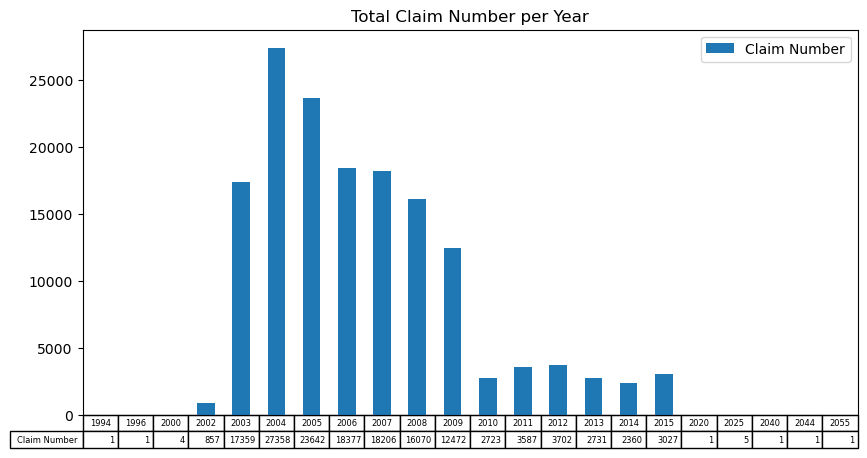

In [106]:
Year_groups = df.groupby(df['Incident Date'].dt.year)['Claim Number'].count()
Year = pd.DataFrame(Year_groups)
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
Year.plot(table=True, ax=ax, kind='bar',figsize=(10,5),title='Total Claim Number per Year')

Berdasarkan grafik diatas, dapat dilihat bahwa jumlah Claim dari penumpang terbanyak terjadi pada tahun 2004. 

Menurut salah satu Jurnal berjudul 'The Impact of Post-9/11 Airport Security Measures on the Demand for Air Travel' oleh Blalock et al (2007), menyatakan bahwa setelah terjadinya kejadian 9/11 di Amerika Serikat, TSA melakuka 3 perubahan untuk meningkatkan efisiensi operasi Security-Screening

1. TSA meningkatkan staff untuk membantu mengurangi waktu tunggu pada 'security lines', serta penambahan screeners untuk penumpang dan bagasi.
2. TSA meningkatkan kompensasi kepada screeners dengan memberikan upah lebih dan benefit karena tingginya turnover.
3. TSA meningkatkan pelatihan pada screeners dan membutuhkan sekitar 100 jam untuk pelatihan screeners penumpang dan bagasi

Dengan adanya perubahan tersebut menyebabkan adanya kebutuhan untuk pengalokasian dana dari operasi TSA ini. Hal ini disebabkan karena overstaff pegawai dan berakibat banyak pegawai yang hanya berdiri terutama pada bandara transit. Sehingga untuk mengatasi hal tersebut, TSA mengurangi pekerja screener sebanyak 45,300 pada Januari 2004. Namun, pengurangan tersebut ditambah dengan kesulitan untuk merekrut screeners tambahan menyebabkan beberapa bandara besar yang menjadi understaff dan berdampak pada security, delay dan penumpang gagal terbang.

Pada tahun 2010 adalah era technology advancement pada airport di Bandara. Seperti adanya 'full-body scanners', yang didesain untuk mendeteksi senjata besi dan ledakan serta ancaman lainnya, yang dapat tertutupi baju dan tidak bisa terdeteksi metal detector. Hal ini dapat mengurangi kehilangan barang penumpang, karena misalnya Laptop bisa tetap dalam tas, minuman juga bisa tetap dalam tas pada saat proses screening, sehingga penumpang tidak perlu melakukan pemisahan/pengeluaran barang dari tas, yang biasa menyebabkan barang hilang.

<AxesSubplot:title={'center':'Total Claim Number per Month'}, xlabel='Incident Date'>

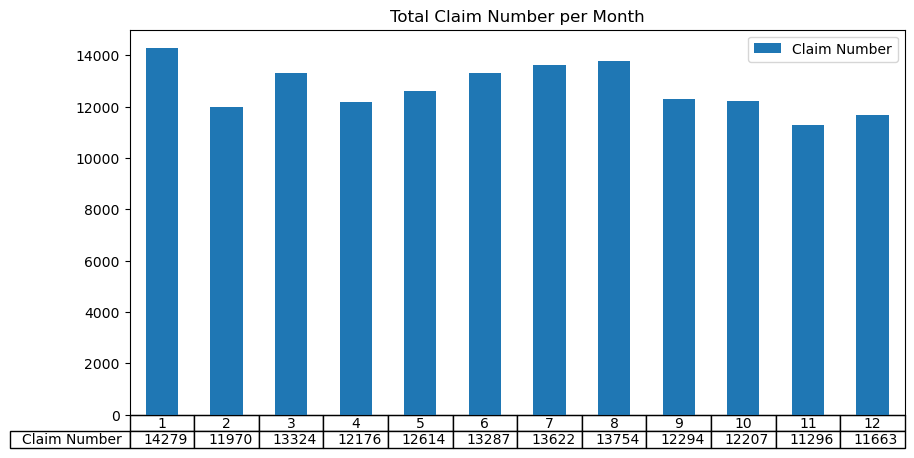

In [107]:
Month_groups = df.groupby(df['Incident Date'].dt.month)['Claim Number'].count()
Month = pd.DataFrame(Month_groups)
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
Month.plot(table=True, ax=ax, kind='bar',figsize=(10,5),title='Total Claim Number per Month')

Jumlah claim terbanyak terjadi biasanya pada bulan Januari, menurut nerdwallet.com Bandara sangat sibuk pada saat Natal dan Tahun baru hal ini yang menyebabkan potensi tingginya claim barang dari penumpang terhadap US TSA pada bulan Januari. Desember 27 biasanya merupakan paling crowded karena menuju tahun baru, dimana natal cenderung lebih suka dirayakan Bersama keluarga.

<AxesSubplot:title={'center':'Top 5 Airport Highest Claim Number'}, xlabel='Airport Name'>

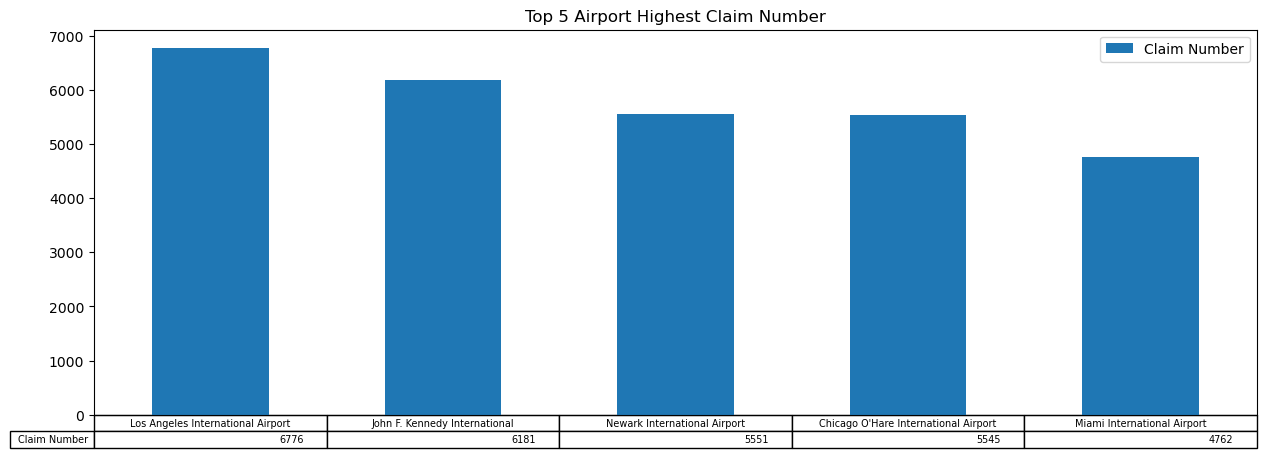

In [108]:
Airport_groups = df.groupby(df['Airport Name'])['Claim Number'].count().sort_values(ascending = False).head()
Airport = pd.DataFrame(Airport_groups)
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
Airport.plot(table=True, ax=ax, kind='bar',figsize=(15,5),title='Top 5 Airport Highest Claim Number')

Berdasarkan airportslostandfound.com Los Angeles Airport (LAX) menduduki posisi pertama sebagai claim dari penumpang tertinggi dilanjuti oleh  JFK dan Newark Liberty Airport (Sesuai dengan Data). Menurut Airport officials, LAX merupakan bandara nomor satu sebagai origin dan destinasi penumpang, itu lah mengapa LAX memiliki claim terbanyak. Dari sumber polisi, sering terjadi pencurian dari luggage di LAX. Telah dilakukan investigasi terhadap beberapa pegawai TSA dan pengurus bagasi, bahwa mereka memeriksa barang penumpang dan mencuri barang. Hal ini dapat dilakukan dengan mudah, karena barang selalu bergerak secara konstan, dan terkadang berada pada area yang aman, sehingga mempermudah pegawai untuk mengambil barang. Menurut latimes.com, pencurian sering terjadi pada akhir system kompleks dari conveyor belts, yang mengantar barang. Karena koper diangkut, pada saat proses pemindaha tersebut sangat mudah untuk adanya pengambilan barang.

<AxesSubplot:title={'center':'Claim Number Per Claim Site'}, xlabel='Claim Site'>

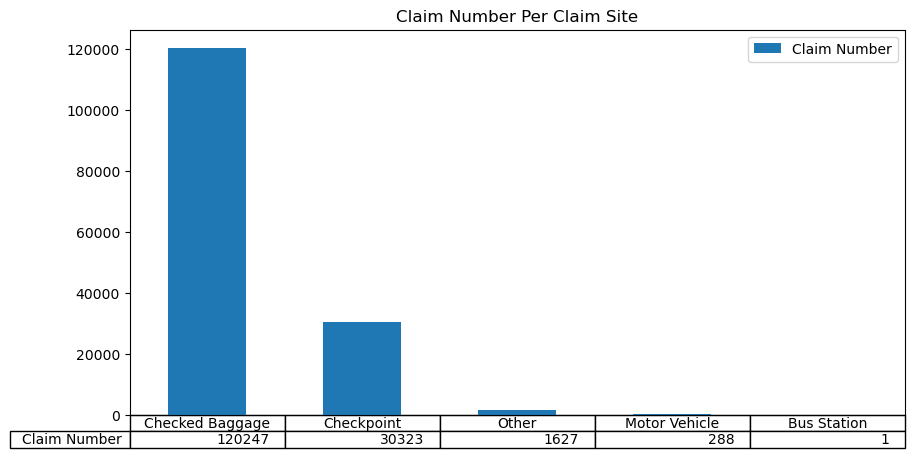

In [109]:
Site_groups = df.groupby(df['Claim Site'])['Claim Number'].count().sort_values(ascending = False)
Site = pd.DataFrame(Site_groups)
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
Site.plot(table=True, ax=ax, kind='bar',figsize=(10,5),title='Claim Number Per Claim Site')

Kondisi Aiport LAX masih memiliki keterkatian dengan grafik diatas, yang menunjukan bahwa kejadian Claim paling sering terjadi pada 'Checked Baggage', sehingga memang ada potensi besar bahwa kejadian tersebut disebabkan oleh internal pegawai Airport baik secara tidak disengaja maupun disengaja.

<AxesSubplot:title={'center':'Percentage by Disposition'}, ylabel='Claim Number'>

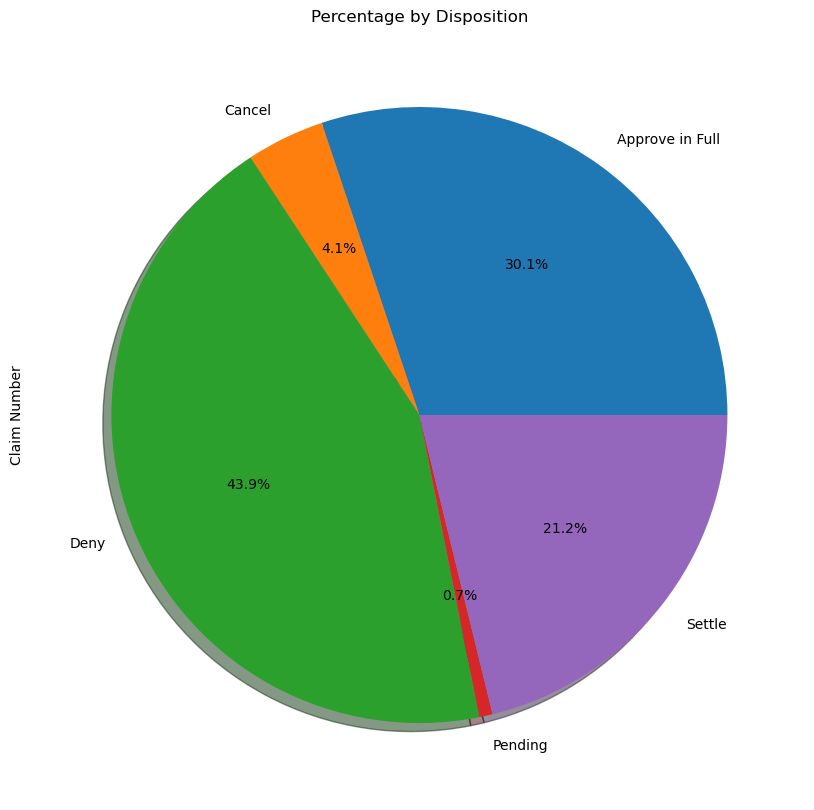

In [110]:
Dispo_groups = df.groupby(df['Disposition'])['Claim Number'].count()
Dispo = pd.DataFrame(Dispo_groups)
Dispo.plot.pie(y='Claim Number', figsize=(10, 10), title="Percentage by Disposition", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0)

Berdasarkan grafik disamping dapat dilihat bahwa jadi jumlah Claim yang telah diajukan oleh pengunjung, ternyata sebanyak 43,87% adalah 'Deny' atau ditolak pihak TSA. Menurut website TSA, apabila penumpang ingin melakukan 'Claim' kepada TSA, terdapat beberapa prosedur administrasi yang perlu dilengkapi penumpang. Kesalahan atau kekurangan penumpang dalam melengkapi dokumen tersebut yang biasanya menjadi kendala dalam melakukan 'Claim' sehingga dari pihak TSA tidak memiliki wewenang untuk melakukan pemayaran 'Claim' tersebut

<AxesSubplot:title={'center':'Total Close Amount per Year'}, xlabel='Incident Date'>

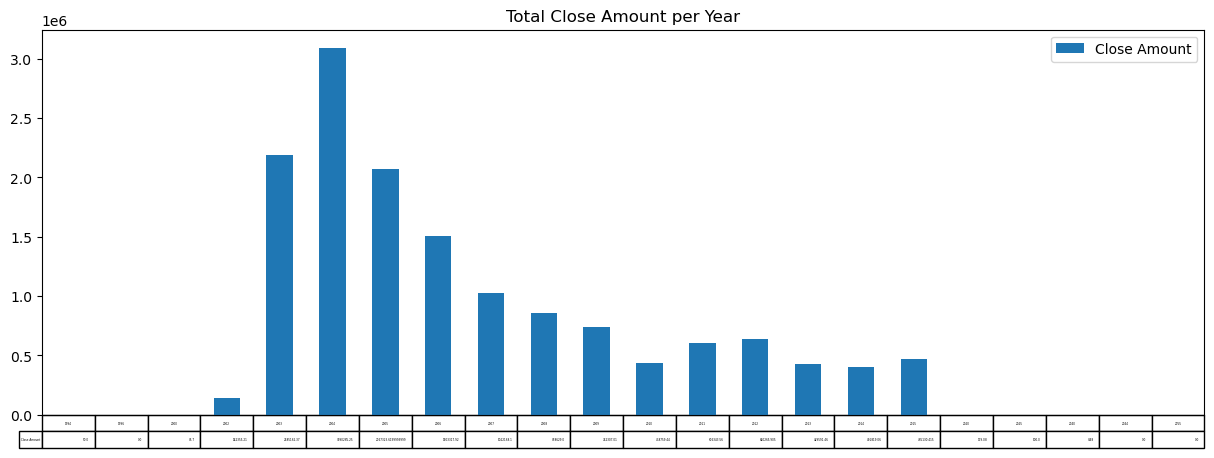

In [111]:
Close_groups = df.groupby(df['Incident Date'].dt.year)['Close Amount'].sum()
Close = pd.DataFrame(Close_groups)
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
xlim=[2002,2015]
Close.plot(table=True, ax=ax, xlim=xlim, kind='bar',figsize=(15,5),title='Total Close Amount per Year')

'Close Amount' merupakan jumlan biaya yang harus dikeluarkan oleh TSA untuk membayar penumpang, sehingga merupakan total dari hasil 'Approve in Full' dan 'Settle'. Dapat terlihat bahwa 'Close Amount' tertinggi terjadi pada tahun 2004, hal ini menunjukan adanya keselarasan dengan jumlah 'Claim' pada setiap tahunnya yang juga menunjukan nilai tertinggi pada tahun 2004.

# Kesimpulan dan Rekomendasi

## Kesimpulan

Berdasarkan analisa data 'TSA Claims Database', dapat disimpulkan bahwa 

1. jumlah 'Claim' terbesar terjadi pada tahun 2004, dan terbesar berada pada Los Angeles Internation Airport dengan lokasi terbanyak terjadi pada 'Checked Baggage'. 
2. Berdasarkan laporan Claim dari penumpang sebagian besar 43,87% ditolak atau 'Deny', yang berarti bahwa sebagian besar Claim yang diajukan oleh penumpang memang secara prosedur tidak memenuhi administrasi / kelalaian penumpang
3. 'Close Amount' yang dikeluarkan oleh TSA yang dengan status 'Approve in Full' dan 'Settle' juga menunjukan pengeluaran terbesar pada tahun 2004 dengan lokasi Los Angeles Internation Airport. 
4. Hal ini menunjukan bahwa Close Amount yang dibayar selaras dengan jumlah Claim yang terlapor.
5. Penurunan terbesar terjadi pada tahun 2010, dimana Airport sudah mulai menggunakan Technology Development dalam proses screening, sehingga mengurangi frekuensi penumpang untuk membukan tas saat proses  sccreening.

## Rekomendasi

Berikut merupakan beberapa rekomendasi yang dapat diterapkan oleh TSA untuk mengatasi 'Claim' kedepannya

1. Berdasarkan data tahun 2010, dimana menunjukan penuruna drastis ketika Airport sudah menggunakan 'Full Body Scanners', sehingga TSA perlu melakukan investment lebih terhadap pegawai untuk Research & Development untuk implementasi teknologi terbaru yang mampu melakukan tracking seluruh barang penumpang yang sudah check in, agar dapat di monitor lokasinya baik dari pihak Airport maupun pihak penumpang (online tracking apps), sehingga Claim barang hilang dapat teratasi secara efektif dan efisien.
2. Evaluasi kembali alur/sistem pengangkutan barang agar dapat termobilisasi secara aman dan mengurangi adanya 'Human Contact' untuk mencegah potensi pencurian dari internal pegawai serta meningkatkan CCTV atau kamera pengaman di seluruh kawasan airport.
3. Evaluasi jumlah penggunaan SDM yang efektif (terutama saat sudah menggunakan teknologi terbaru) agar tidak terjadi overbudget dan overstaff.
4. Memastikan adanya kunjungan dari External Auditor, agar segala 'Close Amount' yang telah dikeluarkan oleh TSA dapat menjadi evaluasi untuk meningkatkan keamanan terhadap barang penumpang.